In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib.image import imread
import numpy as np
from PIL import Image
from sklearn.metrics import f1_score
import cv2 
from os.path import isfile, join
import os 
from os import listdir
import glob 
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import SpectralClustering
from numpy.linalg import eig
from numpy import array
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from numpy import linalg as LA
from copy import deepcopy
from scipy.io import loadmat
from google.colab.patches import cv2_imshow
from scipy.stats import entropy
path="/content/drive/MyDrive/BSR/img/"
path2="/content/drive/MyDrive/BSR/groundtruth/"


In [8]:
pip install pyitlib

**Q-2)**

In [9]:
def show_segmentation(name):
  img = cv2.imread(path+str(name)+".jpg",1)
  gt = loadmat(path2+str(name)+".mat")
  groundT=[]
  groundT.append(img)
  l=img.shape[0]
  w=img.shape[1]
  for i in range(5):
    S=np.full((321,481),255)
    d=gt["groundTruth"][0][i]["Boundaries"]
    data=np.array(d[0][0])
 
    for k in range(l):
      for j in range(w):
        if data[k][j]==1:
          S[k][j]=0 
    groundT.append(S)
  for i in range(len(groundT)):
    cv2_imshow(groundT[i])  
  


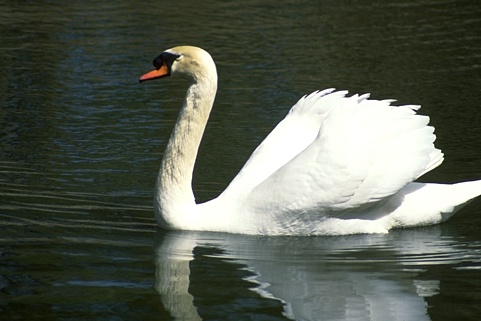

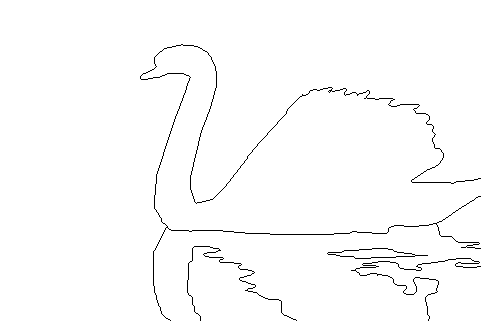

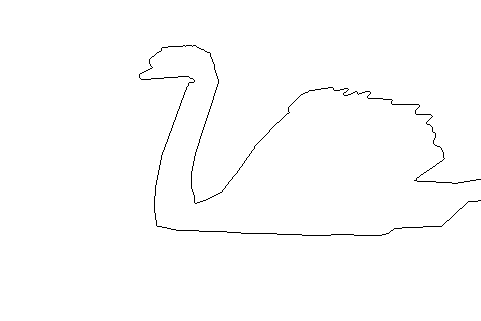

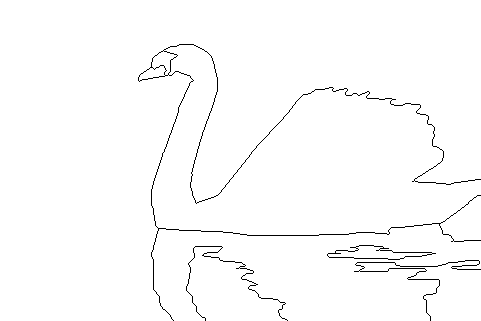

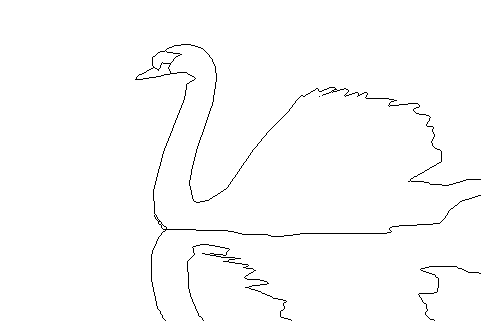

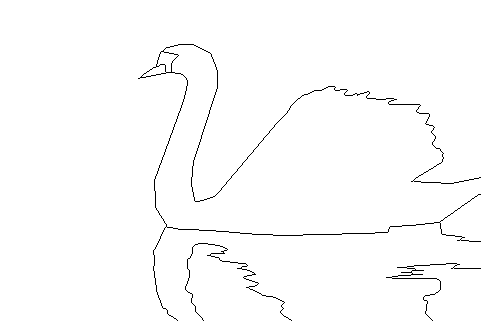

In [10]:
groundT=show_segmentation(8068)

In [11]:
def kmean(data,k):
  
  n=data.shape[0]
  c = data.shape[1]
  mean = np.mean(data, axis = 0)
  std = np.std(data, axis = 0)
  centers = np.random.randint(0,255,size=(k,c))
  centers_old = np.zeros(centers.shape) 
  centers_new = deepcopy(centers) 
  data.shape
  clusters = np.zeros((n))
  distances = np.zeros((n,k))
  labul=np.zeros(n)
  error = np.linalg.norm(centers_new - centers_old)
  
  while error != 0:
    
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)

    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
   
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    
  return clusters,centers_new,



**Q-1)**

In [12]:
def cluster_image(path,k):
  images = []
  for filename in sorted(os.listdir(path)):
      img = cv2.imread(os.path.join(path,filename))
      if img is not None:
        img2=img.reshape((-1,3))
        l,c=kmean(img2,k)
        IS=c[l.flatten()]
        IS2=IS.reshape((img.shape))
        images.append(IS2)
#images  
  data =np.array(images)
  return data


In [13]:
def images(name,k):
  
  img = cv2.imread(path+str(name)+".jpg")
  img2=img.reshape((-1,3))
  l,c=kmean(img2,k)
  IS=c[l.flatten()]
  IS2=IS.reshape((img.shape))
  
#images  
  data =np.array(IS2)
  plt.imshow(data)
  plt.show()
  return data


In [14]:
def show_image_segmentation(pixel):
	
	fig, axes = plt.subplots(50, 1, figsize=(100,100),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pixel[i])
	    ax.set_title("IS " + str(i+1))
	plt.show()
 

**Q-3)**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


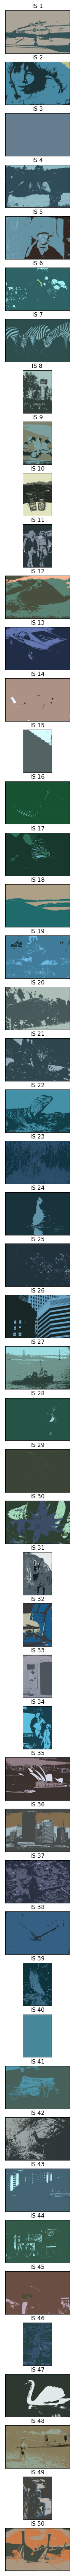

In [16]:
show_image_segmentation(cluster_image(path,3))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


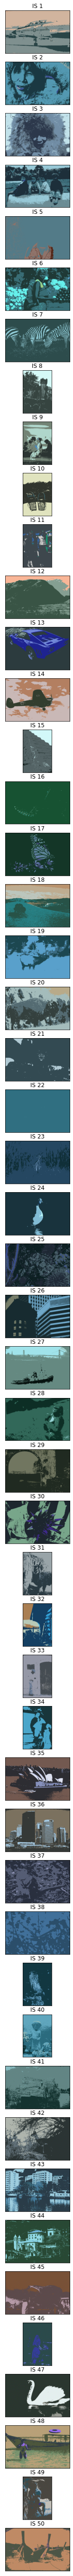

In [17]:
show_image_segmentation(cluster_image(path,5))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


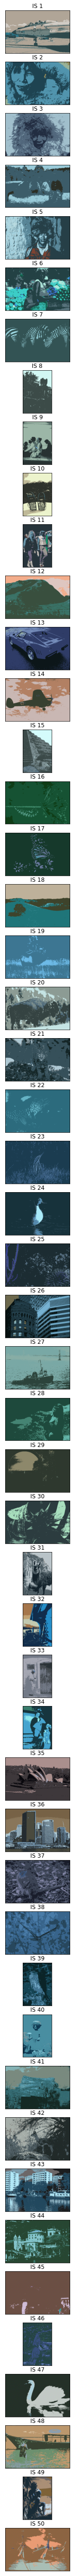

In [18]:
show_image_segmentation(cluster_image(path,7))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


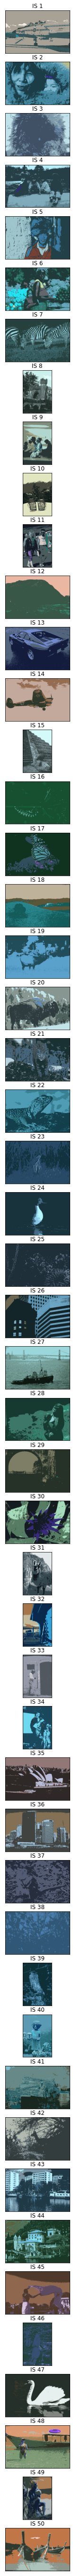

In [19]:
show_image_segmentation(cluster_image(path,9))

In [ ]:
show_image_segmentation(cluster_image(path,11))

In [222]:
def fmeasures(cluster,gt,k):
  FM= f1_score(gt,cluster,average='weighted')
  return FM

In [197]:
def getlabel(name,k):
  images=[]
  gt = loadmat(path2+str(name)+".mat")
  img = cv2.imread(path+str(name)+".jpg",1)
  img2=img.reshape((-1,3))
  l,c=kmean(img2,k)
  IS=c[l.flatten()]
  IS2=IS.reshape((img.shape))
  images.append(IS2)
  data =np.array(images)


  d=gt["groundTruth"][0][0][0][0][0]
  g=d.flatten()
  

  cluster=labeled(IS,5)
  return cluster , g


In [187]:
def entropy (cluster, gt ,k ,gn):
  ent_total=0
  for i in range(k):
    ent=0
    x=np.zero(gn)
    y=0
    for j in range(cluster.size):
      if cluster[j]==i:
        y+=1
        x[gt[j]-1]+=1
    for j in range(gn-1):
      if(x[j]!=0):
        ent-=x[j]/y*np.log2(x[j]/y)
    ent_total+=ent*y/cluster.size
  print(ent_total)


In [189]:
def getConditionalEntropy(cl, attr):
  
  return entropy(cl, qk=attr)

In [147]:
def classes(res,k):
    clustered = []
    listClasses =set(tuple(i) for i in res)
    
    s = list(listClasses)
    print(s)
    for i in range(res[:,0].size):
        for j in range(k):
            if (np.all(res[i] == s[j])):
                clustered.append(j)
    return np.array(clustered)


In [216]:
cluster,g=getlabel(2018,5)

In [217]:
fmeasures(cluster,g)

0.08921791511703153


In [218]:
getConditionalEntropy(cluster,g)

1.0111350373241743

In [ ]:
for filename in sorted(os.listdir(path)):
      img = cv2.imread(os.path.join(path,filename))
      if img is not None:
        img2=img.reshape((-1,3))
        l,c=kmean(img2,k)
        IS=c[l.flatten()]
        IS2=IS.reshape((img.shape))
        images.append(IS2)

In [42]:
from sklearn.metrics.cluster import contingency_matrix
def fmeasure (i_Kmean,kmeanClustered,arr_gt):
    j_2D=[0,1]
    fScore=[]
    Kmeans_=[3,5,7,9,11]

    for i_ in i_Kmean:
        for j in j_2D:
            true_ = kmeanClustered[i_].flatten()
            prediction_ = arr_gt[i_][j].flatten()
            cont = contingency_matrix(prediction_, true_)
            contingency = cont.T
            Actual_P = np.sum(contingency,axis=0)
            Actual_N = np.sum(contingency,axis =1)
            prec = []
            recall =[]
            count = 0
            for i in contingency:
                prec = np.append(prec,(max(i)/Actual_N[count]))
                recall = np.append(recall,(max(i)/Actual_P[np.argmax(i)]))
                count+=1
            f1_measure = (2*prec *recall)/(prec+recall)
            total_f1_measure = (1/len(f1_measure))* np.sum(f1_measure)
            print('For K =' ,Kmeans_[i_])
            print('Fmeasure Value = ',total_f1_measure)
            fScore.append(total_f1_measure)
    return fScore            
       

In [51]:
import scipy.io 

def load_bsd_gt(filename):

    gt = scipy.io.loadmat(path2+str(filename)+".mat");
    # scipy.io.loadmat()
    gt = gt['groundTruth']
    what = ['Segmentation','Boundaries']
    cols = (gt.shape[1])
    ret = list()
    for xx in range(cols):
        j=0
        tmp = list()
        for w in what:
            tmp.append(gt[0][xx][w][0][0][:])
            arr_gt=np.array(tmp[j])
            
            j=j+1
            plt.imshow(arr_gt)
            plt.show()
            ret.append(tmp)
    return ret

**Q-4)**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


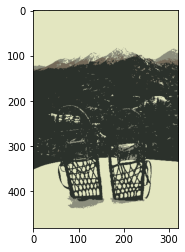

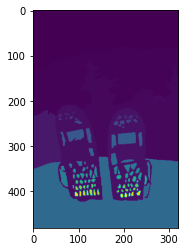

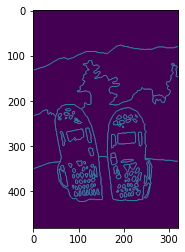

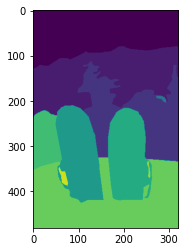

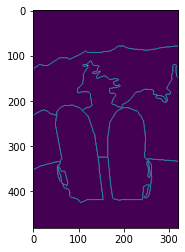

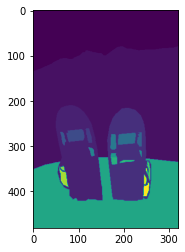

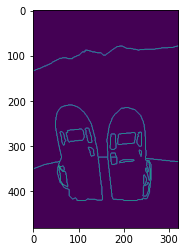

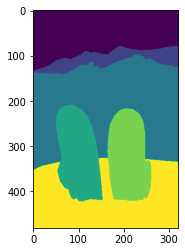

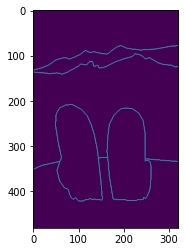

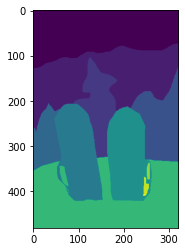

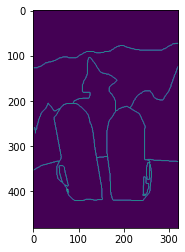

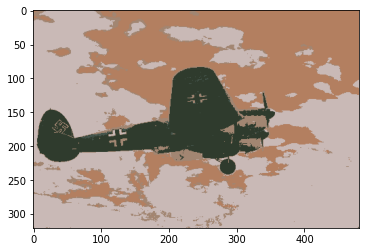

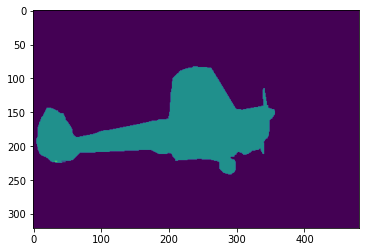

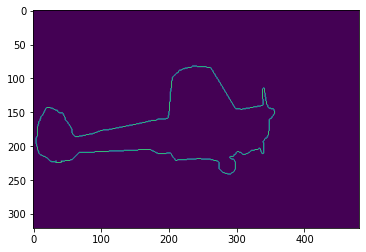

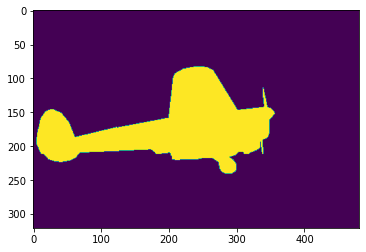

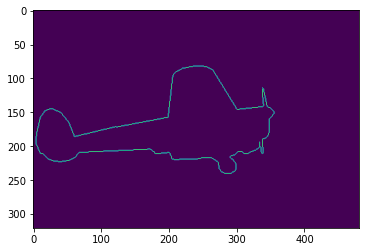

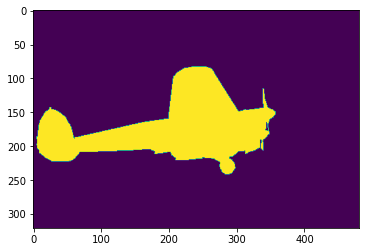

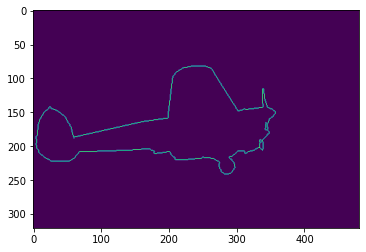

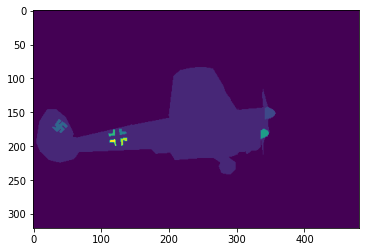

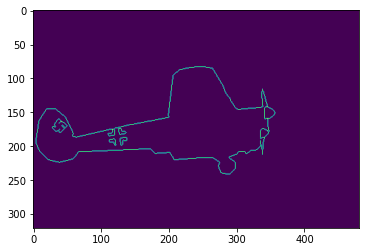

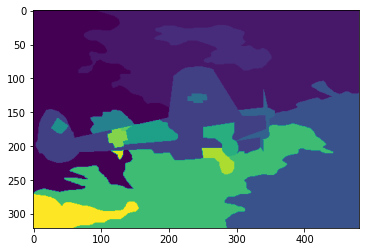

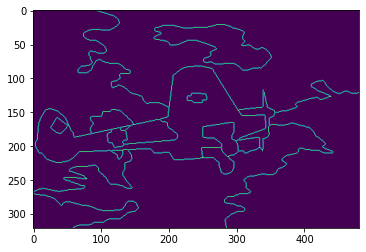

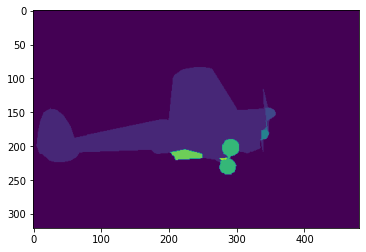

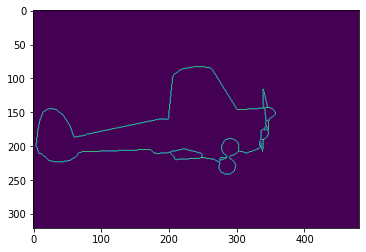

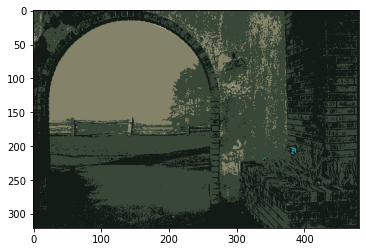

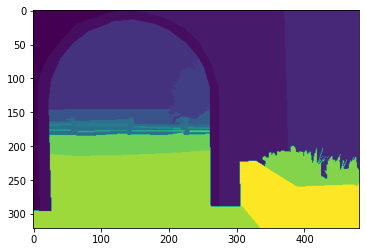

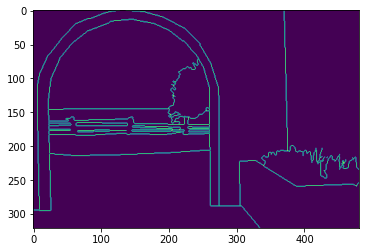

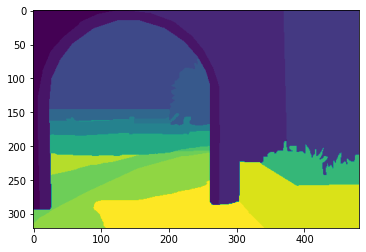

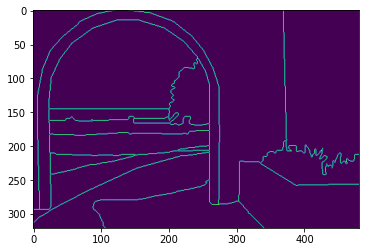

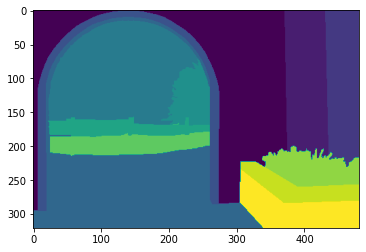

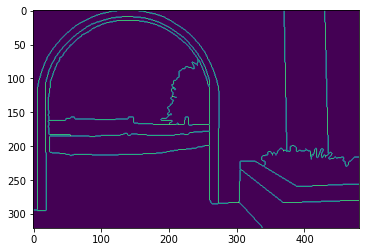

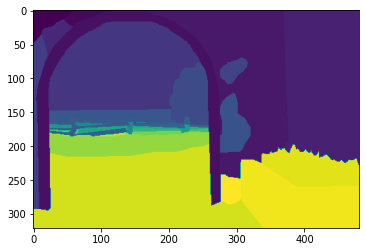

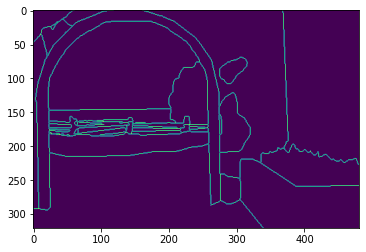

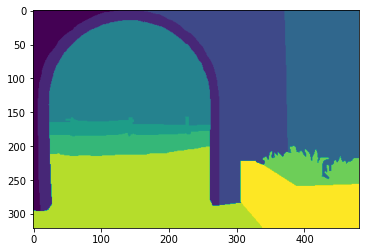

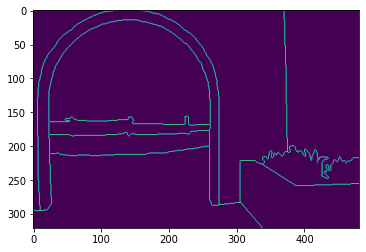

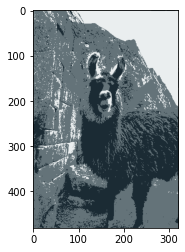

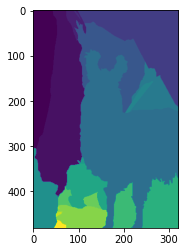

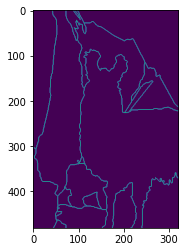

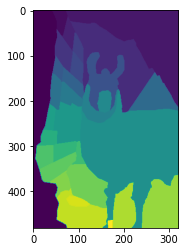

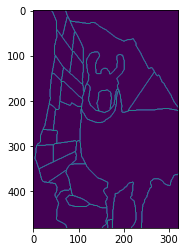

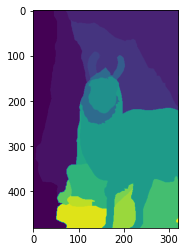

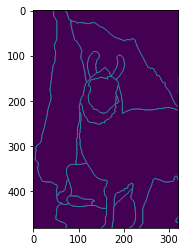

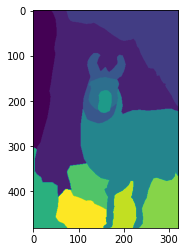

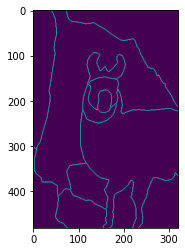

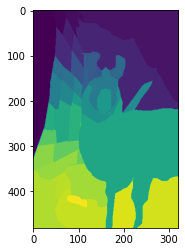

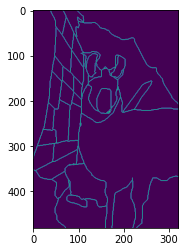

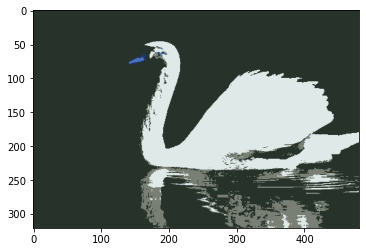

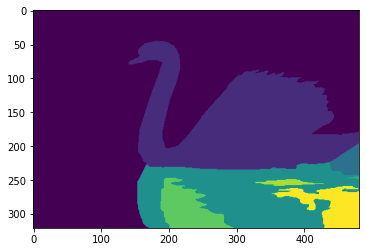

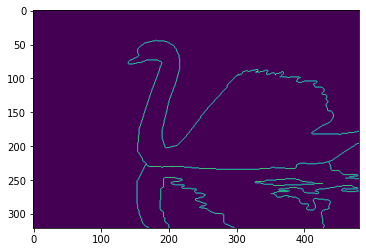

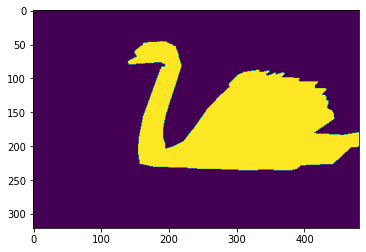

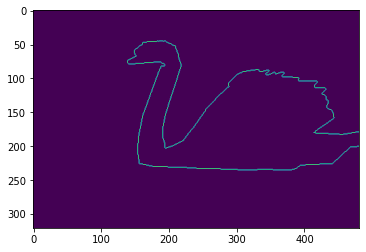

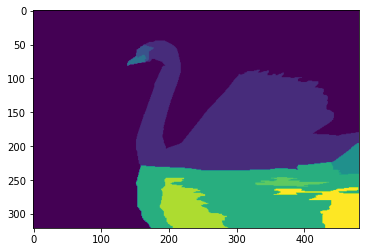

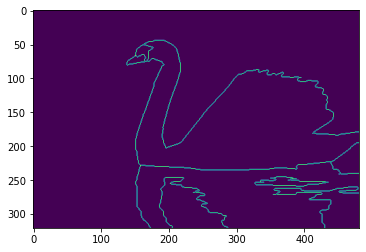

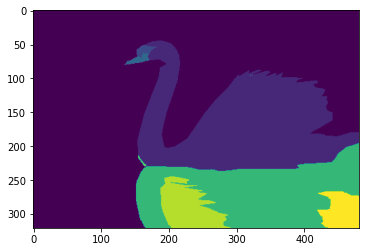

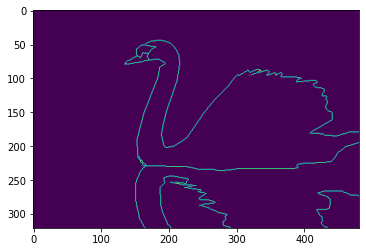

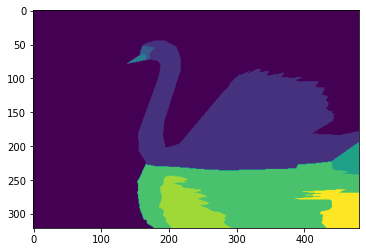

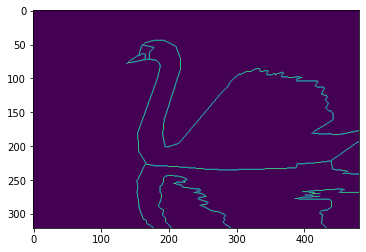

In [52]:
name=[2018,3063,5096,6046,8068]
n=5
for i in range(n):
  img = images(name[i],5)
  
  gt = load_bsd_gt(name[i])
  groundT=[]
  groundT.append(img)
  groundT.append(gt)


  
   
  
  


In [2]:
def ncut(data,k):
  sm = rbf_kernel(data,data,0.01)
  n=data.shape[0]
  for i in range(len(sm)):
    for j in range(len(sm)):
      sm[j][j]=0
      if sm[i][j]>0.85:
        sm[i][j]=1
      else:
        sm[i][j]=0
  D=np.zeros((n,n))
  for i in range(n):
    D[i][i]=np.sum(sm[i])
  L=D-sm
  eigenValues, eigenVectors = np.linalg.eig(L)

  idx = eigenValues.argsort()   
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:,idx]
  U=np.real( np.delete(eigenVectors, np.s_[k:24], axis=1)   )
  for i in range(n):
    U[i]=U[i]/np.linalg.norm(U[i])
  return U   



In [20]:

imagesFile_path = path
image= cv2.imread(path+"2018.jpg")
image_data = np.asarray(image)
res=np.resize(image_data,(100,100,3))
data_img=cv2.GaussianBlur(res,(7,7),0)
unrolled=data_img.reshape(-1,3)
unrolled
print(unrolled)

[[177 178 148]
 [177 177 147]
 [177 177 147]
 ...
 [235 235 199]
 [235 236 199]
 [236 236 199]]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


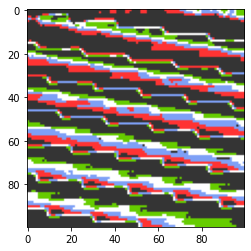

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


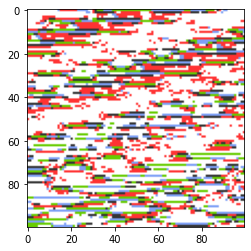

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


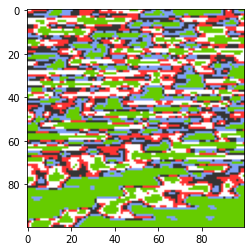

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


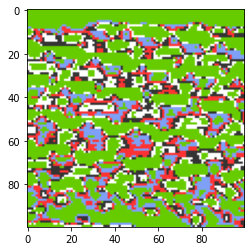

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


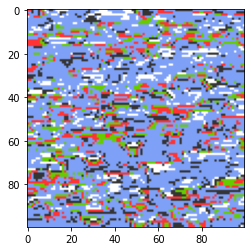

In [4]:
name=[2018,3063,5096,6046,8068]
n=5
for i in range(n):
  imagesFile_path = path
  image= cv2.imread(path+str(name[i])+".jpg")
  image_data = np.asarray(image)
  res=np.resize(image_data,(100,100,3))
  data_img=cv2.GaussianBlur(res,(7,7),0)
  unrolled=data_img.reshape(-1,3)
  unrolled
 
  affinity=np.linalg.norm(unrolled[:, None, :] - unrolled[None, :, :], axis=-1)
  
  affinity = np.array(affinity)
  affinity=affinity.reshape(10000,10000)
  clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity="precomputed").fit(affinity)
  colors = [[52,52,52],[126, 160, 246],[255,255,255],[255,51,51],[102,204,0]]
  newImage = []
  for k in range(0,10000):
    newImage.append(clustering.[clustering.labels_[k]])
  
  newImage=np.array(newImage).reshape(100,100,3)
  plt.imshow(newImage)
  plt.show()

In [53]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt

def nor_cutt(name):
  img =cv2.imread(path+str(name)+".jpg")

  labels1 = segmentation.slic(img, compactness=30, n_segments=400)
  out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

  g = graph.rag_mean_color(img, labels1, mode='similarity')
  labels2 = graph.cut_normalized(labels1, g)
  out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

  fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

  ax[0].imshow(out1)


  for a in ax:
      a.axis('off')

  plt.tight_layout()

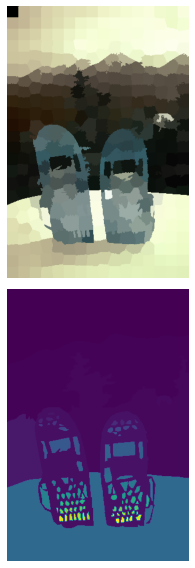

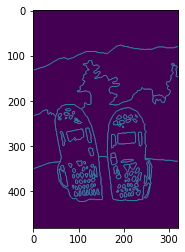

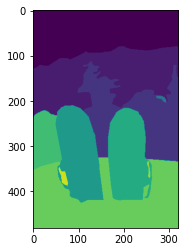

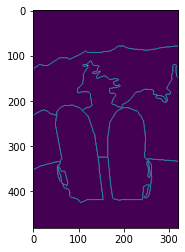

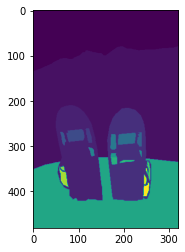

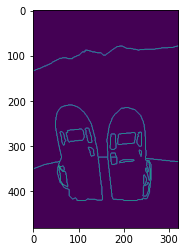

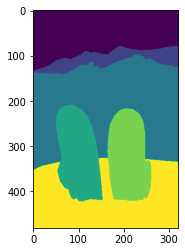

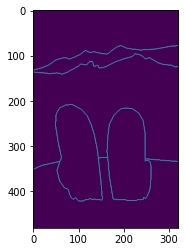

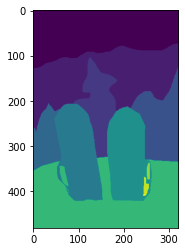

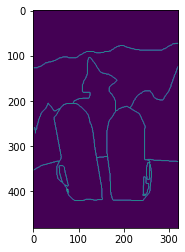

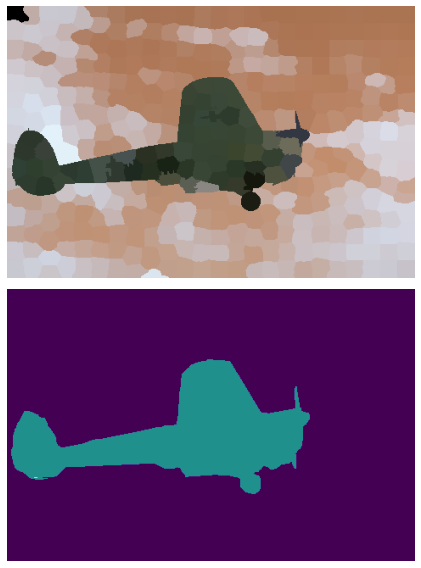

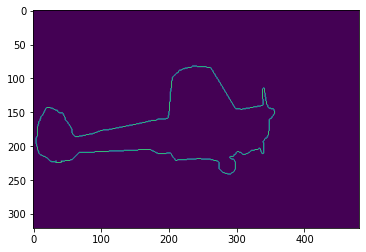

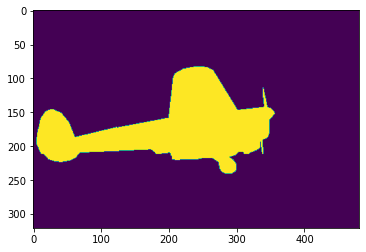

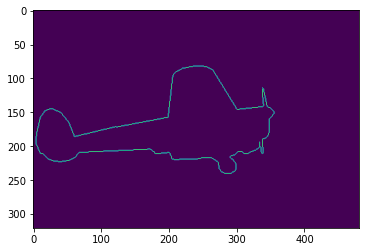

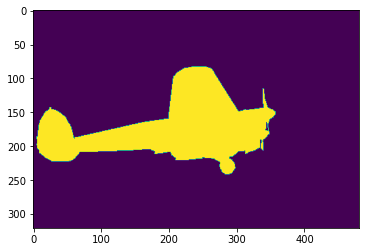

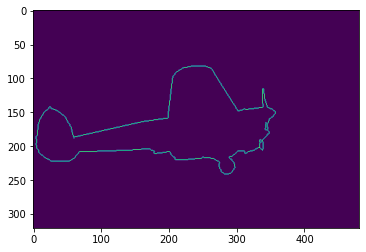

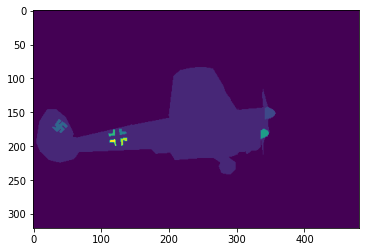

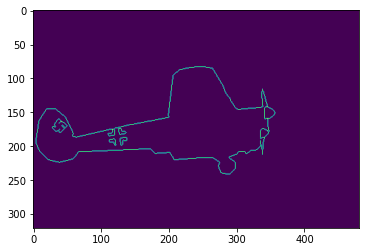

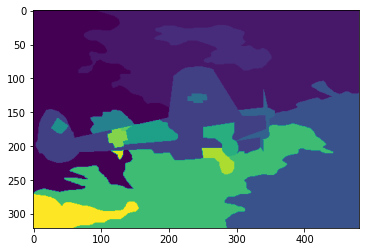

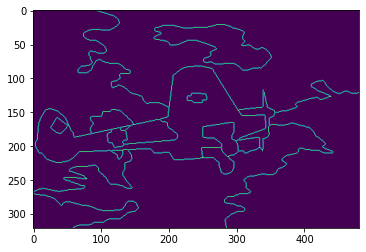

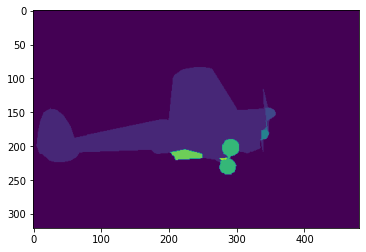

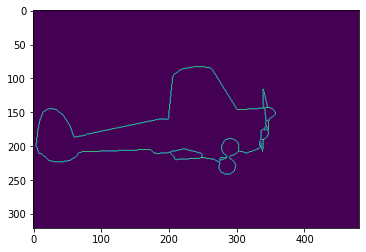

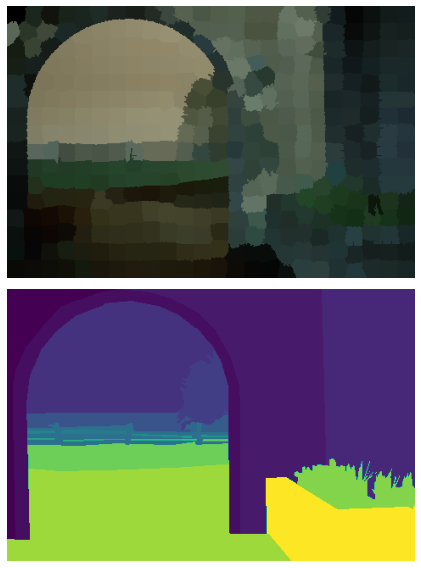

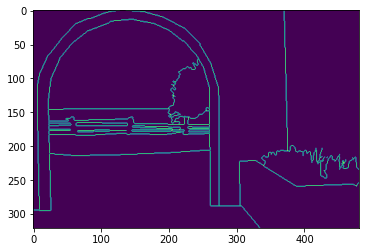

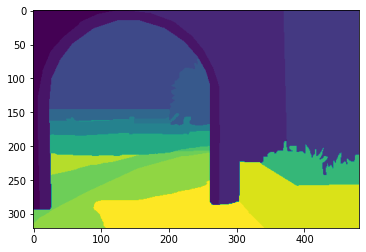

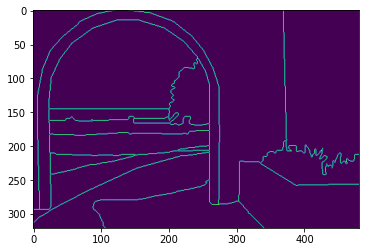

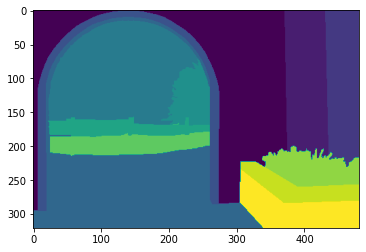

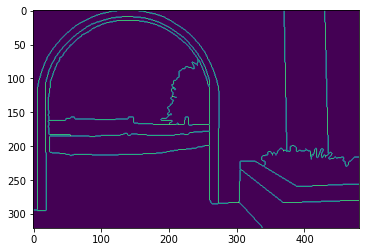

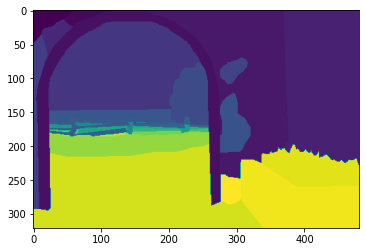

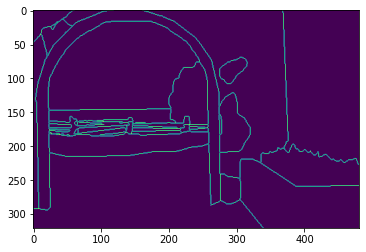

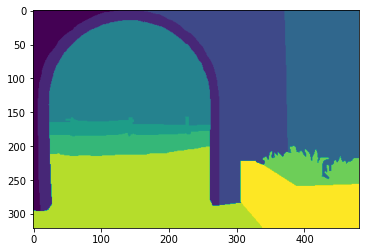

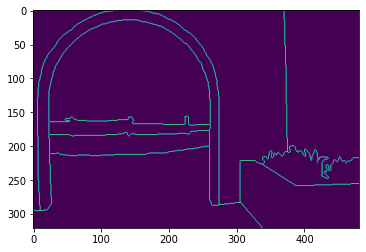

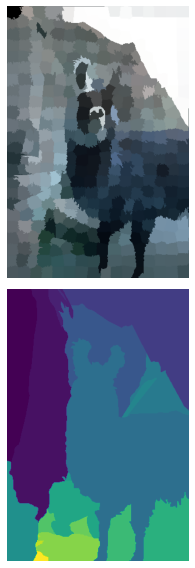

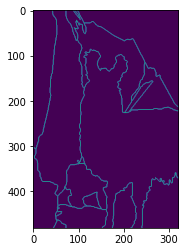

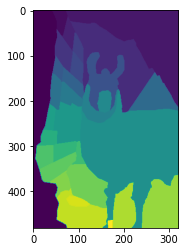

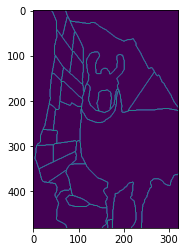

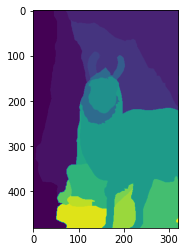

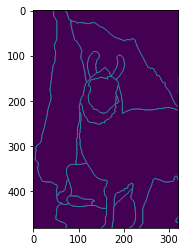

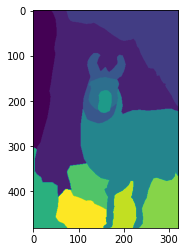

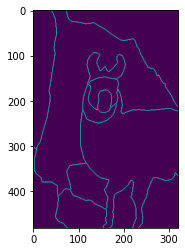

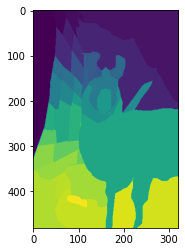

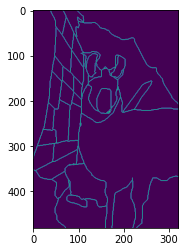

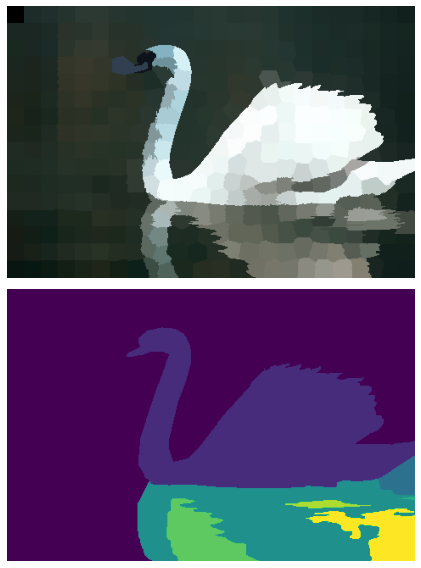

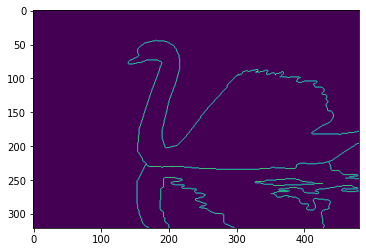

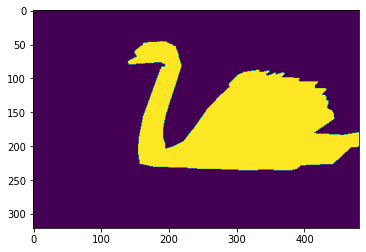

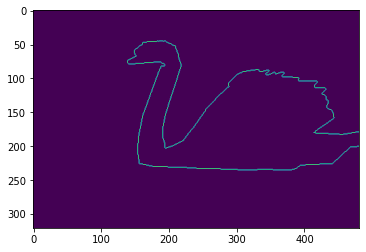

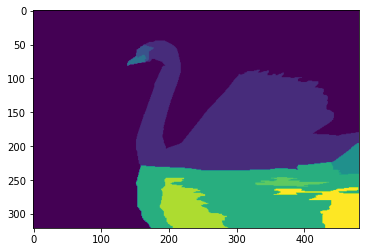

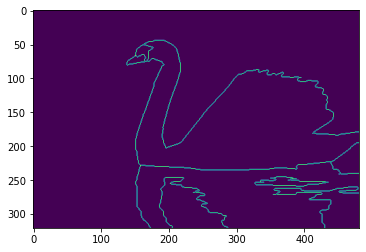

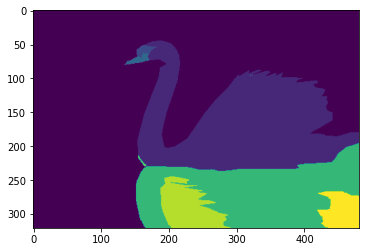

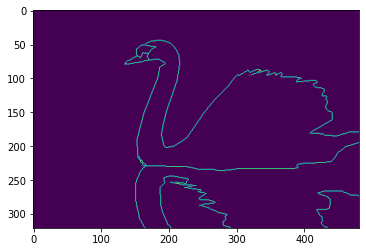

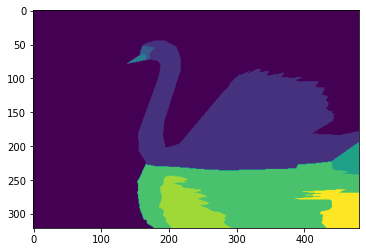

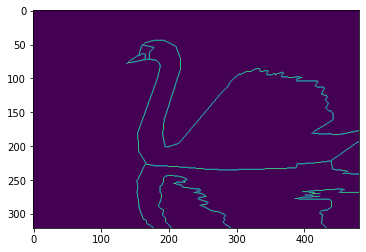

In [54]:
name=[2018,3063,5096,6046,8068]
n=5
for i in range(n):
  img = nor_cutt(name[i])
  
  gt = load_bsd_gt(name[i])
  groundT=[]
  groundT.append(img)
  groundT.append(gt)